In [30]:
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import re

In [32]:
file_path = '/Users/ql/Desktop/8_cleaned.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()
print('read text')

read text


In [34]:
dialog_pattern = re.compile(r'^(.*?):\s*(.*)$', re.MULTILINE)

character_dialogs = defaultdict(list)

for match in dialog_pattern.findall(text):
    character, dialog = match
    character_dialogs[character.strip()].append(dialog.strip())

In [36]:
def count_sentences(dialogs):
    sentence_endings = re.compile(r'[.!?]')
    return sum(len(sentence_endings.findall(dialog)) for dialog in dialogs)

character_sentence_counts = [(char, count_sentences(dialogs)) for char, dialogs in character_dialogs.items()]


In [38]:
df_counts = pd.DataFrame(character_sentence_counts, columns=['Character', 'SentenceCount'])
top_20 = df_counts.sort_values(by='SentenceCount', ascending=False).head(20)
pd.set_option('display.max_rows', None)
top_20

,Character,SentenceCount
0,Ethan,512
13,Chris,183
41,Duke,148
38,Heisenberg,145
3,Mia,91
75,Monster Heisenberg,49
36,Lady Dimitrescu,48
52,Monster Dimitrescu,38
78,Miranda,37
85,Lobo,36


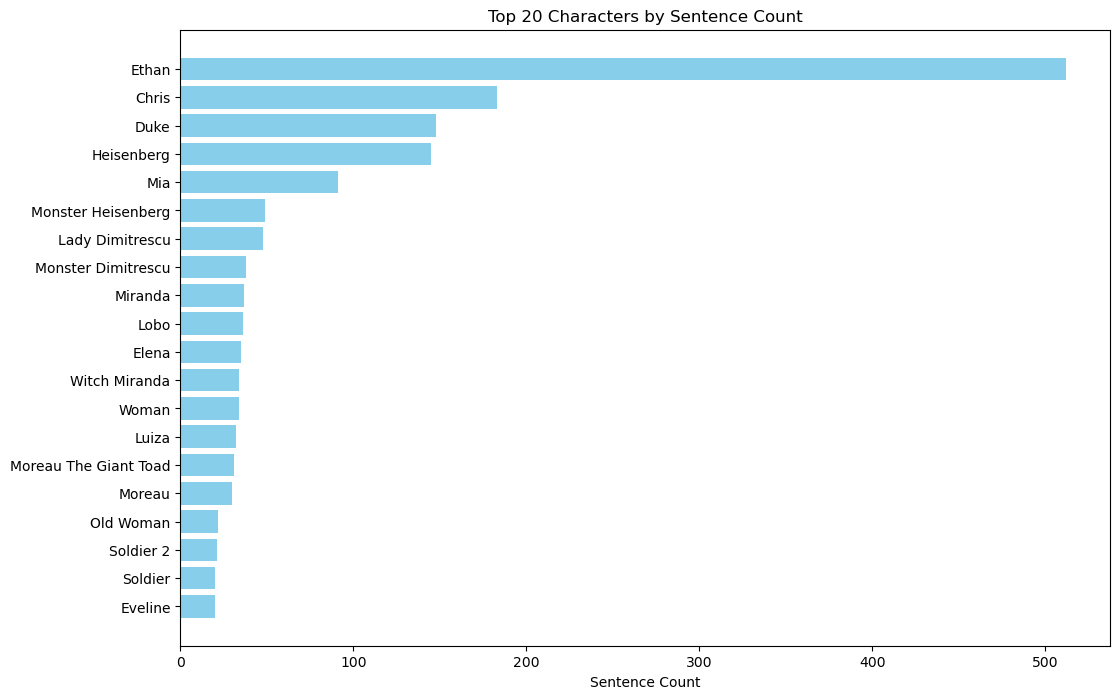

In [66]:
plt.figure(figsize=(12, 8))
plt.barh(top_20['Character'], top_20['SentenceCount'], color='skyblue')
plt.xlabel('Sentence Count')
plt.title('Top 20 Characters by Sentence Count')
plt.gca().invert_yaxis()
plt.show()